In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cod.csv')
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [3]:
df.shape

(1558, 19)

In [4]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [5]:
df.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [7]:
import seaborn as sns

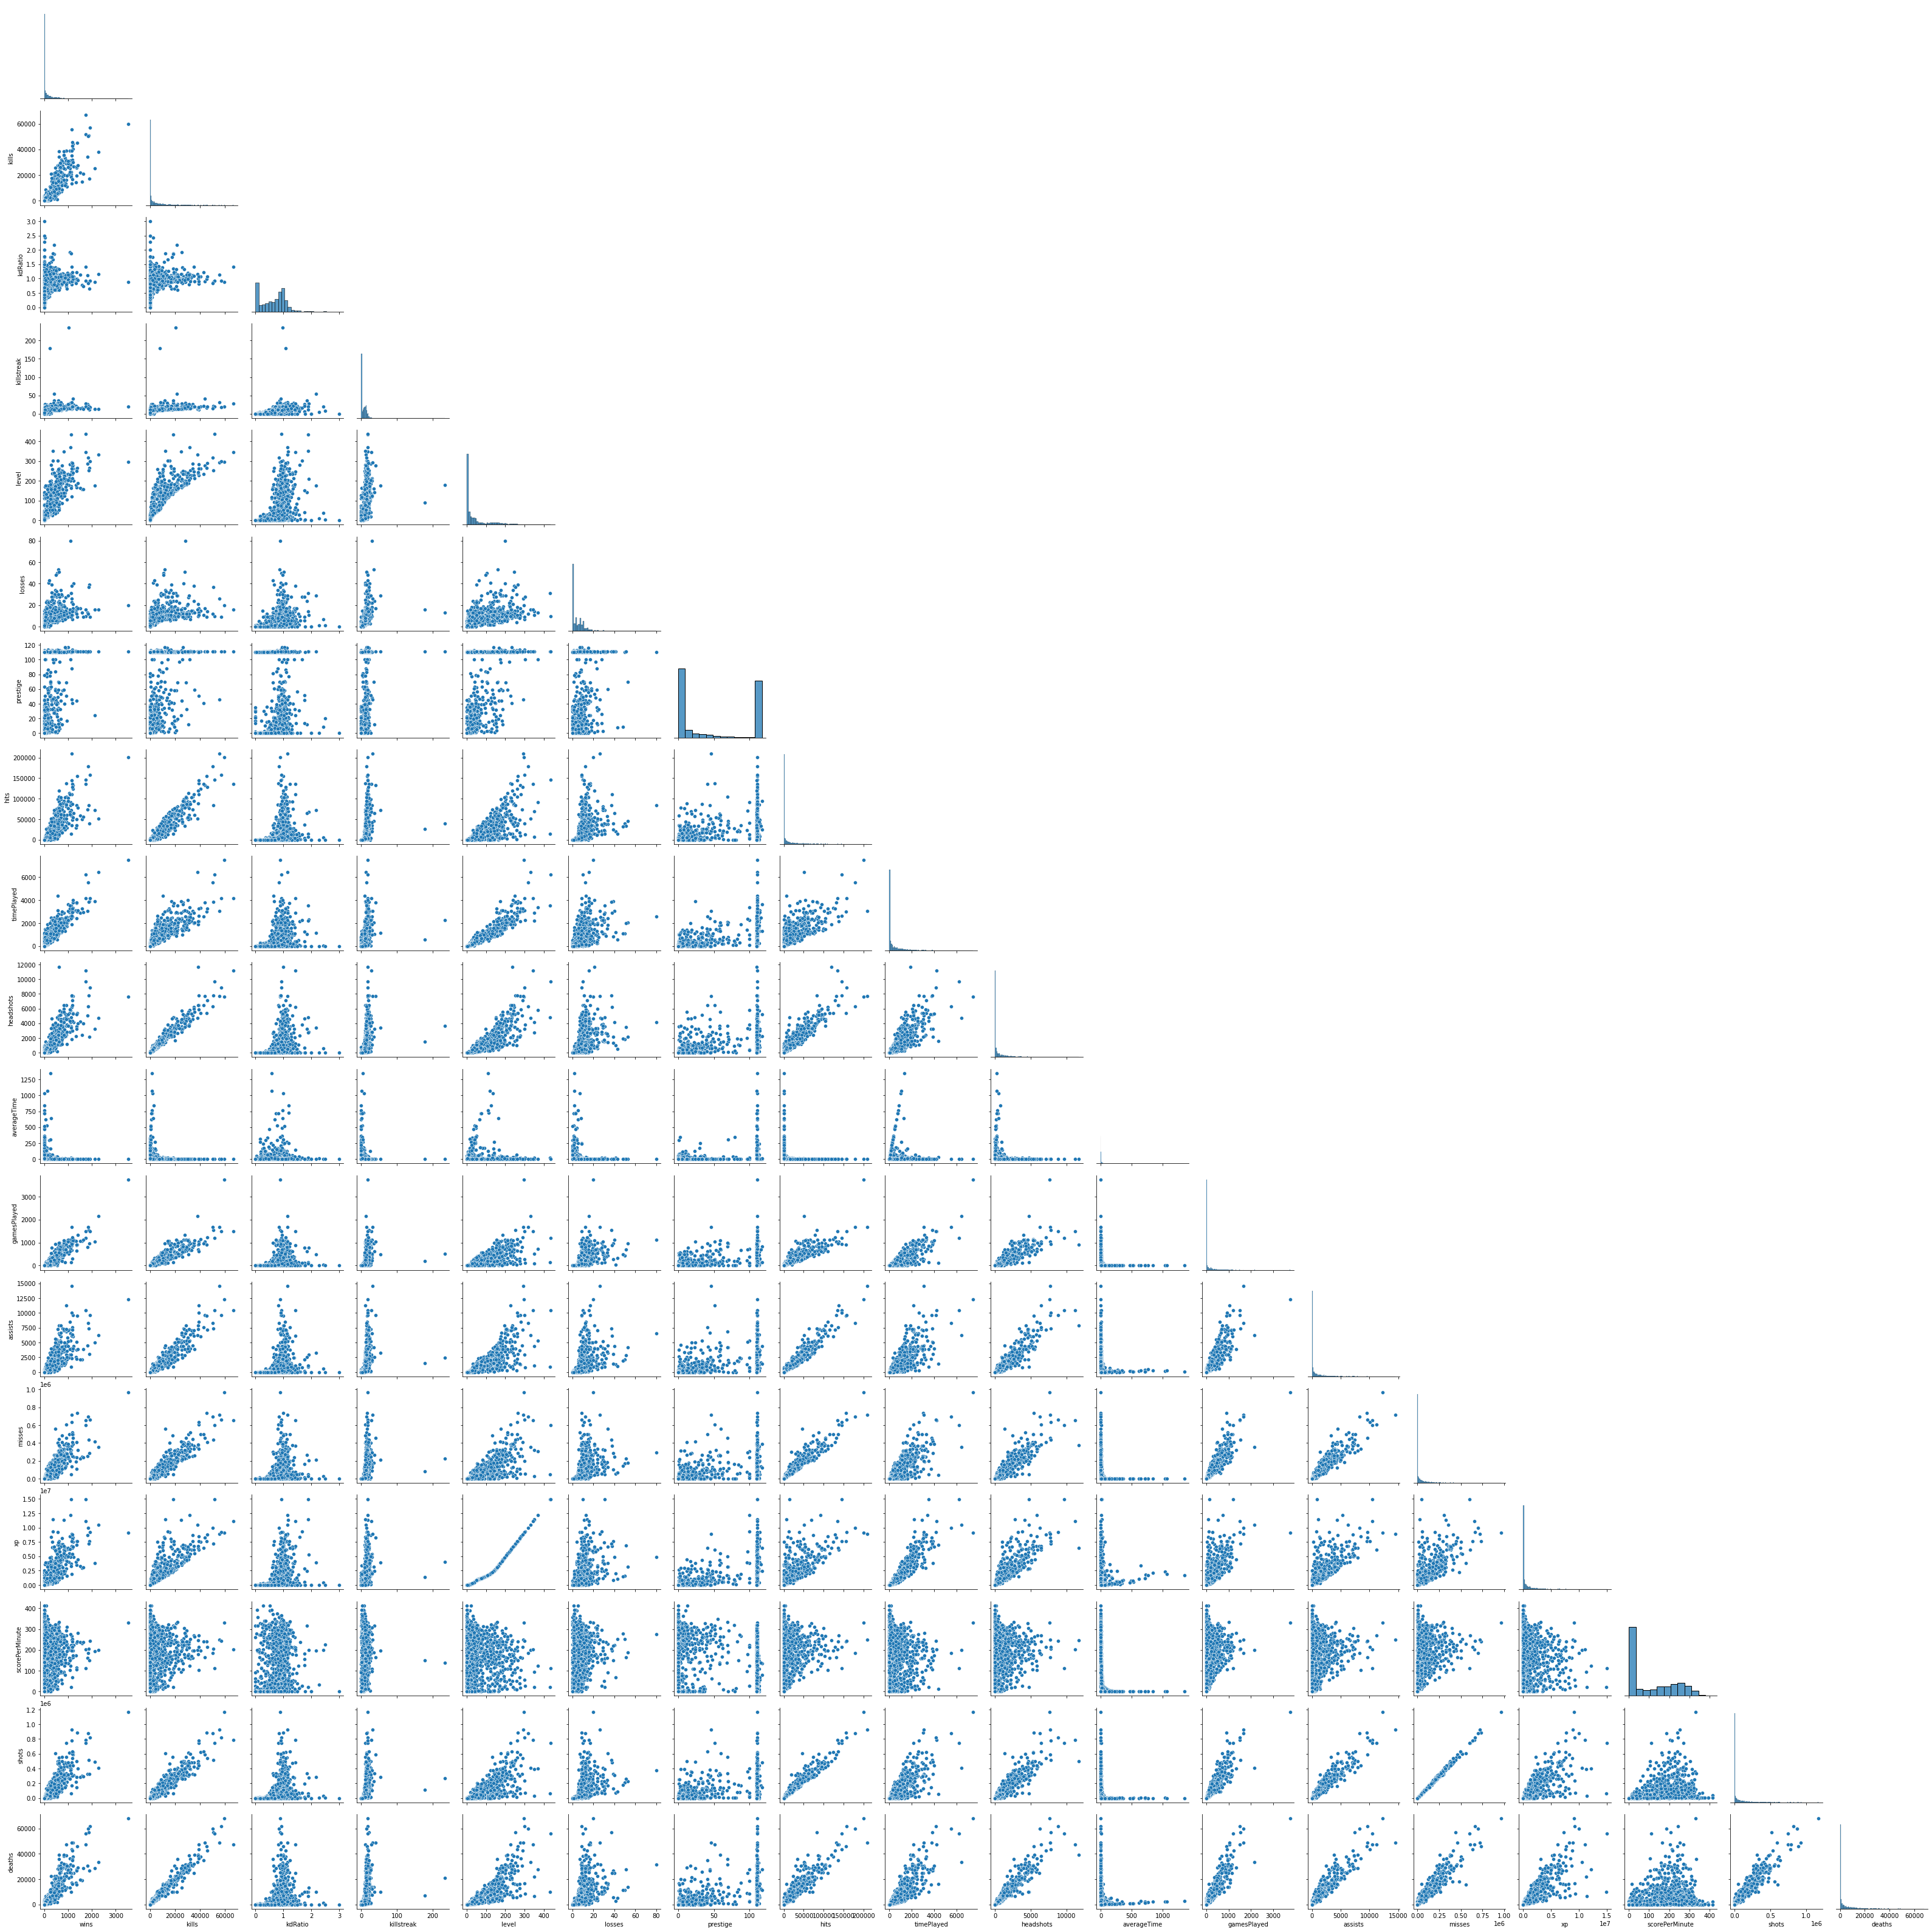

In [8]:
sns.pairplot(data=df,corner=True)

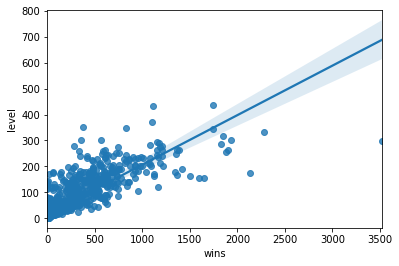

In [9]:
sns.regplot(data=df, x="wins", y="level")


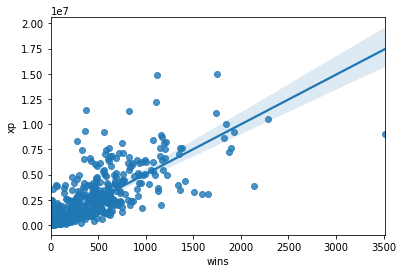

In [10]:
sns.regplot(data=df, x="wins", y="xp")

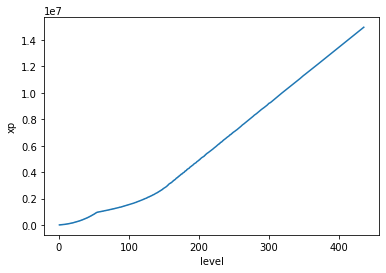

In [37]:
sns.lineplot(data=df, x="level", y="xp")  #Level and XP is linearly related to each other

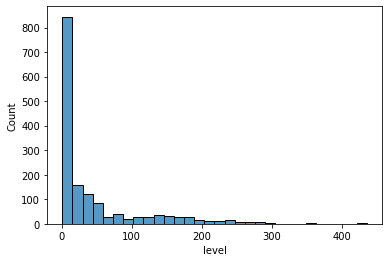

In [38]:
sns.histplot(data=df,x='level',bins=30)    #Most of the players has lower levels

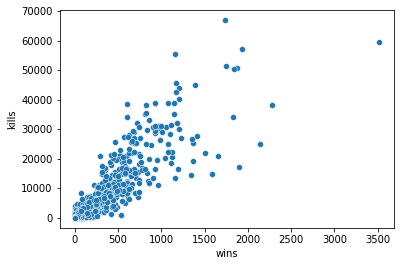

In [42]:
sns.scatterplot(data=df, x="wins", y="kills")


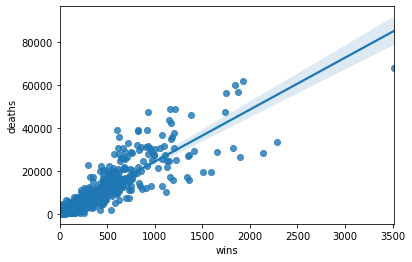

In [13]:
sns.regplot(data=df, x="wins", y="deaths")

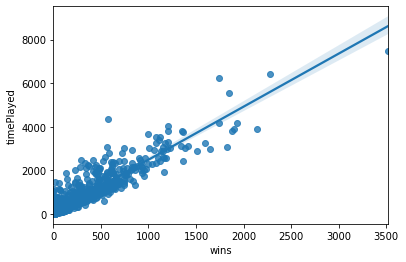

In [14]:
sns.regplot(data=df, x="wins", y="timePlayed")

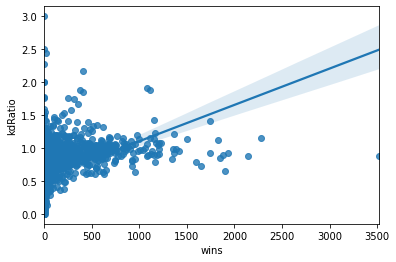

In [45]:
sns.regplot(data=df, x="wins", y="kdRatio") #Higher KDRatio does not determin higher wins

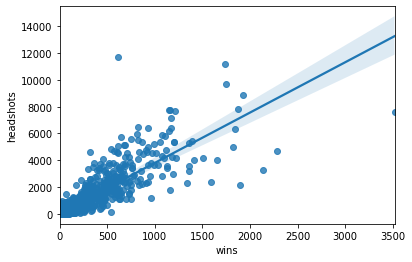

In [16]:
sns.regplot(data=df, x="wins", y="headshots")  #Higher Head Shots represent high chances of winning

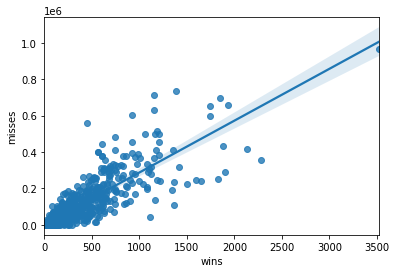

In [17]:
sns.regplot(data=df, x="wins", y="misses")

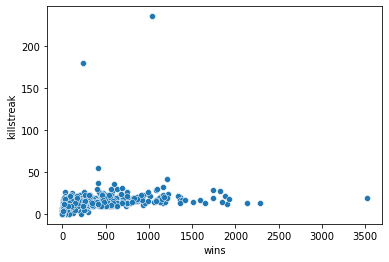

In [18]:
sns.scatterplot(data=df, x="wins", y="killstreak")   #Killing Streak does not co related with wins

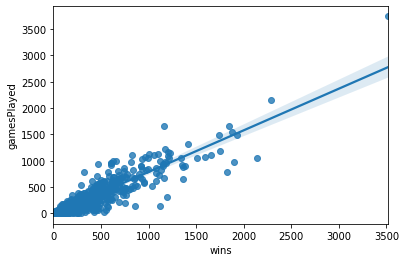

In [19]:
sns.regplot(data=df, x="wins", y="gamesPlayed")    #Higher number of gmaes played ,higher chances of winning

In [20]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [21]:
#CLustering

X = df.iloc[:,[1,9]].values  #Forming CLuster on parmaters of kdRatio and number of games played



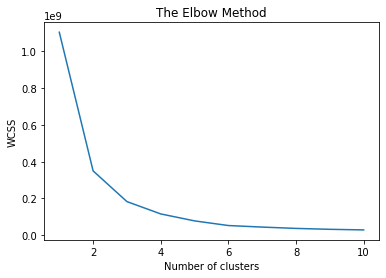

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

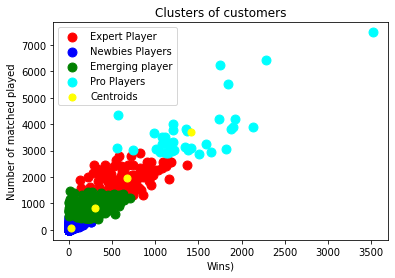

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Expert Player')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Newbies Players')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Emerging player')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Pro Players')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Wins)')
plt.ylabel('Number of matched played')
plt.legend()
plt.show()


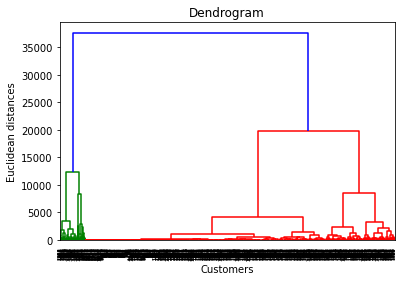

In [25]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()                 #calculating idle cluster with help of dendogrogrmas

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

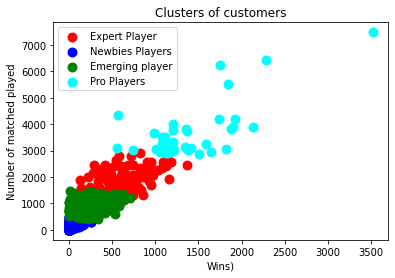

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Expert Player')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Newbies Players')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Emerging player')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Pro Players')



plt.title('Clusters of customers')
plt.xlabel('Wins)')
plt.ylabel('Number of matched played')
plt.legend()
plt.show()